# Analysis of Indirect Problem

In [1]:
%pylab inline
import pickle
from scipy.stats import sem

Populating the interactive namespace from numpy and matplotlib


In [2]:
results = map(lambda f: pickle.load(open(f, "r")),
              ["results_benchmark_pendulum_approxik.pickle",
               "results_benchmark_pendulum_exactik.pickle",
               "results_benchmark_pendulum_joint.pickle",
               ])
methods = ["Approximate IK",
           "Exact IK",
           "Joint space"
           ]

In [3]:
n_methods = len(results)
n_runs = len(results[0])
n_episodes = len(results[0][0][1])


res = dict((method, np.empty((n_runs, n_episodes)))
           for method in methods)
runs = {method: 0 for method in methods}
for i in range(len(methods)):
    for j in range(n_runs):
        name, learning_curve, final = results[i][j]
        res[methods[i]][runs[methods[i]]] = learning_curve
        runs[methods[i]] += 1

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/pymodules/python2.7/matplotlib/backends/backend_pdf.py:2184: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


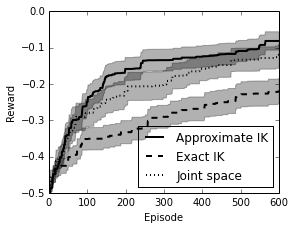

In [4]:
figure(figsize=(4, 3), dpi=200)
subplots_adjust(left=0.15, right=0.95, bottom=0.14, top=0.98)
colors = ["k", "k", "k", "k", "k"]
linstyles = ["-", "--", ":", "-.", ".."]
step_size = 1
x = np.arange(1, n_episodes + 1, step_size)
for i, method in enumerate(methods):
    runs = res[method]
    m = np.maximum.accumulate(runs.T).T.mean(axis=0)[::step_size]
    s = sem(np.maximum.accumulate(runs.T).T, axis=0)[::step_size]
    #s = np.maximum.accumulate(runs.T).T.std(axis=0)[::step_size]
    #m = runs.mean(axis=0)[::step_size]
    #s = sem(runs, axis=0)[::step_size]
    plot(x, m, label=method, lw=2, c=colors[i], ls=linstyles[i])
    # Uncomment to plot all runs
    #plot(x, runs[:, ::step_size].T)
    #plot(x, np.maximum.accumulate(runs.T)[::step_size])
    #plot(x, np.maximum.accumulate(runs.T)[::step_size], c=colors[i], ls=linstyles[i])
    fill_between(x, m - s, m + s, alpha=0.3, color=colors[i])
xlabel("Episode")
ylabel("Reward")
ylim((-0.5, 0))
legend(loc="lower right")
savefig("result_comparison_pendulum.pdf")